In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import mlutils
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

import seaborn as sbn
import matplotlib.pyplot as plt

# Ridge

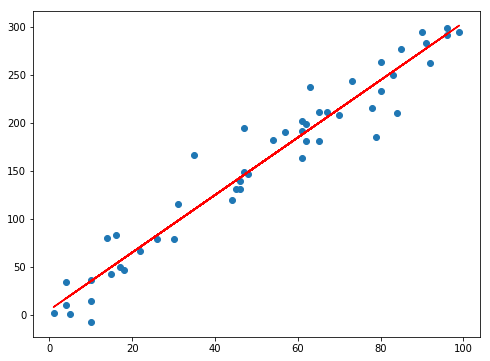

In [2]:
#lets generate some linear random model and then add it some ramdom columns:
np.random.seed(2357)
n = 50
x = np.random.randint(0, high=100, size=n)
y = 5 + 3*x
y = y + np.random.normal(loc=0, scale=20, size=n)

#plot
fig = plt.figure(figsize=(8,6))
plt.scatter(x=x, y=y)
plt.plot(x, 5+3*x, "r-")

In [3]:
#and now lets create some new random columns to see how they affect the model
np.random.seed(10)
x1 = 10*np.random.rand(n)
x2 = 10*np.random.rand(n)
x3 = 10*np.random.rand(n)
x4 = 10*np.random.rand(n)
x5 = 10*np.random.rand(n)

In [4]:
df = pd.DataFrame({
    "X":x,
    "X1":x1,
    "X2":x2,
    "X3":x3,
    "X4":x4,
    "X5":x5,
    "Y":y
})
df.head(10)

,X,X1,X2,X3,X4,X5,Y
0,47,7.713206,3.925292,5.781364,4.396052,8.133161,148.583578
1,35,0.207519,0.934604,8.539338,1.662021,7.848667,166.542750
2,78,6.336482,8.211057,0.680973,5.069786,3.934191,215.416583
3,48,7.488039,1.511520,4.645308,8.190359,8.644792,147.020466
4,26,4.985070,3.841144,7.819491,0.901067,3.840308,79.227429
5,80,2.247966,9.442607,7.186028,8.000688,2.573029,233.282227
6,61,1.980629,9.876255,5.860220,5.651264,8.294019,191.990250
7,16,7.605307,4.563045,0.370944,5.893477,7.363827,83.659685
8,65,1.691108,8.261228,3.506564,1.981007,5.076009,181.398016
9,46,0.883398,2.513741,5.631907,4.361183,6.443266,131.740169


In [5]:
#the correlation of Y with the variables X1 and X2 is not significant
df.corr()["Y"].sort_values(ascending=False)

Y     1.000000
X     0.969971
X5    0.117252
X1    0.029047
X3   -0.046219
X4   -0.103894
X2   -0.210493
Name: Y, dtype: float64

In [6]:
#target
Y = df["Y"]

#feactures
X = df[["X"]]

#spliting
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123, test_size=0.2)

#model:
lr = LinearRegression()

#training
lr.fit(X=X_train, y=y_train)

LinearRegression()

In [7]:
lr.coef_, lr.intercept_

(array([2.99805628]), 7.691511143926846)

In [8]:
y_pred = lr.predict(X=X_test)
print("score training:", lr.score(X=X_train, y=y_train))
print("score testing: ", lr.score(X=X_test, y=y_test))
print("MSE:", metrics.mean_absolute_error(y_pred=y_pred, y_true=y_test))
print("RMSE:", metrics.mean_squared_error(y_pred=y_pred, y_true=y_test)**0.5)

score training: 0.9418316171357723
score testing:  0.9253332970166241
MSE: 16.395525776639015
RMSE: 23.19571976255625


In [9]:
#now lets see what happen if we add the X1, X2 columns
X2 = df.drop("Y", axis=1)

#split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, random_state=123, test_size=0.2)

#model and training
lr2 = LinearRegression()
lr2.fit(X=X2_train, y=y2_train)

LinearRegression()

In [10]:
lr2.coef_, lr2.intercept_

(array([ 2.92392354,  1.09659846, -1.91394591, -0.88361606, -0.97944686,
         1.86922481]), 13.97262110107522)

In [11]:
y2_pred = lr2.predict(X=X2_test)
print("score training:", lr2.score(X=X2_train, y=y2_train))
print("score testing: ", lr2.score(X=X2_test, y=y2_test))
print("MSE:", metrics.mean_absolute_error(y_pred=y2_pred, y_true=y2_test))
print("RMSE:", metrics.mean_squared_error(y_pred=y2_pred, y_true=y2_test)**0.5)

score training: 0.9510229282346897
score testing:  0.9233644783065608
MSE: 18.05936824141955
RMSE: 23.499543450913297


In [12]:
#lets do a ridge regression
ridge = Ridge(alpha=1000)

#training
ridge.fit(X=X2_train, y=y2_train)

Ridge(alpha=1000)

In [13]:
yR_pred = ridge.predict(X=X2_test)
print("score training:", ridge.score(X=X2_train, y=y2_train))
print("score testing: ", ridge.score(X=X2_test, y=y2_test))
print("MSE:", metrics.mean_absolute_error(y_pred=yR_pred, y_true=y2_test))
print("RMSE:", metrics.mean_squared_error(y_pred=yR_pred, y_true=y2_test)**0.5)

score training: 0.9450850263130786
score testing:  0.9242316003349785
MSE: 18.29435031125052
RMSE: 23.366217934731875


In [14]:
ridge.coef_, ridge.intercept_

(array([ 2.89398675,  0.16507491, -0.44109889, -0.22332124, -0.27957037,
         0.50967361]), 14.051018139103093)

In [15]:
#As we raise the value of alpha ridge gives less importance to X1, X2... but they will never be 0
#the metrics are almost the same as for the lr. The MSE and RMSE are both bigger

# Lasso

In [16]:
#model
lasso = Lasso(alpha=100)

#training
lasso.fit(X=X2_train, y=y2_train)

Lasso(alpha=100)

In [17]:
yL_pred = lasso.predict(X=X2_test)
print("score training:", lasso.score(X=X2_train, y=y2_train))
print("score testing: ", lasso.score(X=X2_test, y=y2_test))
print("MSE:", metrics.mean_absolute_error(y_pred=yL_pred, y_true=y2_test))
print("RMSE:", metrics.mean_squared_error(y_pred=yL_pred, y_true=y2_test)**0.5)

score training: 0.9403804361575971
score testing:  0.9255718595029835
MSE: 18.179600905501957
RMSE: 23.158634586278772


In [18]:
lasso.coef_, lasso.intercept_

(array([ 2.88037323,  0.        , -0.        , -0.        , -0.        ,
         0.        ]), 13.822798361193293)

In [19]:
#as we can see Lasso gets to eliminate the X1, X2... variables (which are the ones with the smaller correlation with Y).
#so lasso can be useful for a dimensional reduction

# Lasso and Ridge to eliminate linear dependencies

In [32]:
#Lets add some linear dependency in the feactures and try with Lasso and Riedge

In [44]:
np.random.seed(2357)
n  = 50
x  = np.random.randint(0, high=100, size=n)
##xx = np.random.randint(0, high=100, size=n)
xx = 2*x + 3
y  = 1 + 3*x + 5*xx
y  = y + np.random.normal(loc=0, scale=20, size=n)

#random columns
np.random.seed(11)
x1 = 10*np.random.rand(n)
x2 = 10*np.random.rand(n)
x3 = 10*np.random.rand(n)
x4 = 10*np.random.rand(n)
x5 = 10*np.random.rand(n)

In [45]:
df2 = pd.DataFrame({
    "X":x,
    "XX":xx,
    "X1":x1,
    "X2":x2,
    "X3":x3,
    "X4":x4,
    "X5":x5,
    "Y":y
})
df2.head(10)

,X,XX,X1,X2,X3,X4,X5,Y
0,47,97,1.802697,6.160184,3.181872,9.560583,0.654466,629.583578
1,35,73,0.194752,3.614835,2.180034,9.659309,5.746559,527.542750
2,78,159,4.632185,1.688173,8.449385,3.577892,6.879362,1006.416583
3,48,99,7.249339,4.362409,3.021647,0.458702,5.683058,638.020466
4,26,55,4.202036,7.328253,4.382207,5.539273,6.037265,350.227429
5,80,163,4.854271,0.628876,0.914146,7.363095,5.996501,1044.282227
6,61,125,0.127808,0.207330,3.009792,6.480465,9.026474,812.990250
7,16,35,4.873716,7.705481,0.856948,0.529328,5.310294,254.659685
8,65,133,9.418067,2.999520,3.437133,2.328828,8.613927,842.398016
9,46,95,8.507951,7.011643,7.093010,7.058843,3.519716,602.740169


In [46]:
df2.corr().Y.sort_values(ascending=False)[1:]

XX    0.998347
X     0.998347
X4    0.174610
X3    0.085093
X5    0.026049
X2   -0.031038
X1   -0.275995
Name: Y, dtype: float64

### Riedge 

In [47]:
#target
yy = df["Y"]

#features
XX = df.drop("Y", axis=1)

#spliting
Xx_train, Xx_test, yy_train, yy_test = train_test_split(XX, yy, random_state=234, test_size=0.2)

#model
riedge2 = Ridge(alpha=1000)

#training
riedge2.fit(X=Xx_train, y=yy_train)

Ridge(alpha=1000)

In [48]:
yr_pred = riedge2.predict(X=Xx_test)
print("score training:", riedge2.score(X=Xx_train, y=yy_train))
print("score testing: ", riedge2.score(X=Xx_test, y=yy_test))
print("MSE:", metrics.mean_absolute_error(y_pred=yr_pred, y_true=yy_test))
print("RMSE:", metrics.mean_squared_error(y_pred=yr_pred, y_true=yy_test)**0.5)

score training: 0.955680079643249
score testing:  0.8138138736643914
MSE: 20.69836510852653
RMSE: 27.971409399638123


In [49]:
riedge2.coef_, riedge2.intercept_

(array([ 2.97927153,  0.42376357, -0.30568581, -0.19724508, -0.23205544,
         0.39061476]), 6.302151665605919)

In [50]:
#as we see riedge sees that xx is linear dependent on x and gives it a low coefficient
#(see that in the original model xx has a coefficient of 5)

### Lasso

In [51]:
#model
lasso2 = Lasso(alpha=100)

#training
lasso2.fit(X=Xx_train, y=yy_train)

Lasso(alpha=100)

In [52]:
yl_pred = lasso2.predict(X=Xx_test)
print("score training:", lasso2.score(X=Xx_train, y=yy_train))
print("score testing: ", lasso2.score(X=Xx_test,  y=yy_test))
print("MSE:", metrics.mean_absolute_error(y_pred=yl_pred, y_true=yy_test))
print("RMSE:", metrics.mean_squared_error(y_pred=yl_pred, y_true=yy_test)**0.5)

score training: 0.9516824758567219
score testing:  0.8175588187451835
MSE: 20.458417874942764
RMSE: 27.68867217024793


In [53]:
lasso2.coef_, lasso2.intercept_

(array([ 2.95425893,  0.        , -0.        , -0.        , -0.        ,
         0.        ]), 7.98420082016267)

In [54]:
#and Lasso eliminates completely the coefficient for xx since it is linearly dependent on x